Le **web scraping** consiste à extraire des données de sites web. Selenium Testing est un outil populaire pour le web scraping, car il peut interagir avec les pages web comme un humain, ce qui le rend particulièrement utile pour extraire du contenu dynamique généré par JavaScript.
**Etapes pour travailler avec web sraping**

1.  Installer Selenium :pip install selenium
2.  Téléchargez WebDriver :
      *  **ChromeDriver** : Télécharger ChromeDriver
      *  **GeckoDriver (Firefox)** : Télécharger GeckoDriver

**Selenium **est compatible avec plusieurs navigateurs, mais nous utiliserons **Google Chrome**, le plus populaire. Vous devrez également installer les éléments suivants :

**Google Chrome** : La dernière version du navigateur fera l'affaire.
**ChromeDriver** : Téléchargez celui qui correspond à votre version de Chrome*(pour savoir la version de chrome tape ceci *chrome://settings/help* dans chrome)*, extrayez le dossier zippé et collez le fichier exécutable ( chromedriver.exe) dans le dossier racine de votre projet.


# Step #1: Build a Basic Scraper #
  Initialize a **scraper.py** file in your project directory . The code instantiates a ChromeDriver object and uses it to visit the target site before quitting the driver instance:

In [1]:
%pip install selenium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\naoui\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Importer des bibliothèques et configurer WebDriver : #

In [2]:
from selenium import webdriver
from time import sleep
from selenium.webdriver.chrome.service import Service

import os

# Set th path for webdriver #

In [3]:
path='chromedriver-win64/chromedriver-win64/chromedriver.exe'

 Dans les nouvelles versions de *Selenium (v4+)*, le paramètre executable_path n'existe plus dans le constructeur de *webdriver.Chrome()*.

Depuis *Selenium 4*, il faut utiliser la classe Service pour spécifier le chemin du driver.

#Étape 2 : Configurer le mode headless #

Activez le mode headless pour Chrome dans Selenium en définissant un ChromeOptionsobjet et en le transmettant au constructeur WebDriver de Chrome. De plus, vous devez définir headless=new pour activer le mode headless 

In [7]:
# instantiate a Chrome options object
options = webdriver.ChromeOptions()

# set the options to use Chrome in headless mode
options.add_argument("--headless=new")
 
# initialize an instance of the Chrome driver (browser) in headless mode
browser = webdriver.Chrome(options=options)

# Étape 3 : Extraire des données spécifiques de la page #

Il existe deux méthodes pour localiser des éléments sur une page Web :
*find_element:* Il ne trouve qu'un seul élément. Si plusieurs éléments partagent des sélecteurs similaires, il renvoie le premier élément HTML correspondant à la condition de recherche.
*find_elements:* Il renvoie tous les éléments qui correspondent à la condition de recherche dans un tableau.
Ces deux méthodes prennent en charge huit stratégies de localisation. Nous pouvons les classer en trois catégories :
*Sélecteurs CSS : By.ID , By.CLASS_NAME, et By.CSS_SELECTOR*.
*XPath : By.XPATH* .
*Sélecteurs directs : By.NAME , By.LINK_TEXT, By.PARTIAL_LINK_TEXT, et By.TAG_NAME*.

In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# === LANCEMENT SELENIUM ===
driver = webdriver.Chrome()
driver.get("https://books.toscrape.com")

books = []
page_number = 1

while True:
    print(f"📄 Scraping page {page_number}...")
    
    # Attendre que les livres soient chargés
    WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.CLASS_NAME, "product_pod"))
    )

    # Attente de 30 secondes pour laisser bien charger (comme demandé)
    time.sleep(30)

    # Récupérer tous les liens des livres sur la page
    book_links = driver.find_elements(By.XPATH, "//h3/a")
    links = [link.get_attribute("href") for link in book_links]

    # Parcourir chaque livre
    for link in links:
        driver.get(link)

        title = driver.find_element(By.TAG_NAME, "h1").text

        try:
            description = driver.find_element(
                By.XPATH, "//div[@id='product_description']/following-sibling::p"
            ).text
        except:
            description = "Pas de description"

        price = driver.find_element(By.CLASS_NAME, "price_color").text
        availability = driver.find_element(By.CLASS_NAME, "availability").text.strip()
        image_url = driver.find_element(By.CSS_SELECTOR, ".item.active img").get_attribute("src")

        rating_class = driver.find_element(By.CLASS_NAME, "star-rating").get_attribute("class").split()[-1]
        rating_map = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
        rating = rating_map.get(rating_class, None)

        books.append({
            "Title": title,
            "Description": description,
            "Price": price,
            "Availability": availability,
            "Image_URL": image_url,
            "Rating": rating
        })

    # Retour sur la page pour cliquer sur "Next"
    driver.get(f"https://books.toscrape.com/catalogue/page-{page_number}.html")

    try:
        next_button = driver.find_element(By.CLASS_NAME, "next").find_element(By.TAG_NAME, "a")
        next_page_url = next_button.get_attribute("href")

        # Gestion URL absolue
        if not next_page_url.startswith("http"):
            next_page_url = "https://books.toscrape.com/catalogue/" + next_page_url

        page_number += 1
        driver.get(next_page_url)

    except:
        print(" Fin du scraping - plus de pages.")
        break

# Sauvegarde CSV
df = pd.DataFrame(books)
df.to_csv("books_all_pages.csv", index=False, encoding="utf-8")
print(" Données sauvegardées dans books_all_pages.csv")

driver.quit()


📄 Scraping page 1...
📄 Scraping page 2...
📄 Scraping page 3...
📄 Scraping page 4...
📄 Scraping page 5...
📄 Scraping page 6...
📄 Scraping page 7...
📄 Scraping page 8...
📄 Scraping page 9...
📄 Scraping page 10...
📄 Scraping page 11...
📄 Scraping page 12...
📄 Scraping page 13...
📄 Scraping page 14...
📄 Scraping page 15...
📄 Scraping page 16...
📄 Scraping page 17...
📄 Scraping page 18...
📄 Scraping page 19...
📄 Scraping page 20...
📄 Scraping page 21...
📄 Scraping page 22...
📄 Scraping page 23...
📄 Scraping page 24...
📄 Scraping page 25...
📄 Scraping page 26...
📄 Scraping page 27...
📄 Scraping page 28...
📄 Scraping page 29...
📄 Scraping page 30...
📄 Scraping page 31...
📄 Scraping page 32...
📄 Scraping page 33...
📄 Scraping page 34...
📄 Scraping page 35...
📄 Scraping page 36...
📄 Scraping page 37...
📄 Scraping page 38...
📄 Scraping page 39...
📄 Scraping page 40...
📄 Scraping page 41...
📄 Scraping page 42...
📄 Scraping page 43...
📄 Scraping page 44...
📄 Scraping page 45...
📄 Scraping page 46.

In [29]:
df.head(20)

,Title,Description,Price,Availability,Image_URL,Rating
0,A Light in the Attic,Its hard to imagine a world without A Light in...,£51.77,In stock (22 available),https://books.toscrape.com/media/cache/fe/72/f...,3
1,Tipping the Velvet,Erotic and absorbing...Written with starling p...,£53.74,In stock (20 available),https://books.toscrape.com/media/cache/08/e9/0...,1
2,Soumission,"Dans une France assez proche de la nôtre, un h...",£50.10,In stock (20 available),https://books.toscrape.com/media/cache/ee/cf/e...,1
3,Sharp Objects,"WICKED above her hipbone, GIRL across her hear...",£47.82,In stock (20 available),https://books.toscrape.com/media/cache/c0/59/c...,4
4,Sapiens: A Brief History of Humankind,From a renowned historian comes a groundbreaki...,£54.23,In stock (20 available),https://books.toscrape.com/media/cache/ce/5f/c...,5
5,The Requiem Red,Patient Twenty-nine.A monster roams the halls ...,£22.65,In stock (19 available),https://books.toscrape.com/media/cache/6b/07/6...,1
6,The Dirty Little Secrets of Getting Your Dream...,Drawing on his extensive experience evaluating...,£33.34,In stock (19 available),https://books.toscrape.com/media/cache/e1/1b/e...,4
7,The Coming Woman: A Novel Based on the Life of...,"If you have a heart, if you have a soul, Karen...",£17.93,In stock (19 available),https://books.toscrape.com/media/cache/97/36/9...,3
8,The Boys in the Boat: Nine Americans and Their...,For readers of Laura Hillenbrands Seabiscuit a...,£22.60,In stock (19 available),https://books.toscrape.com/media/cache/d1/2d/d...,4
9,The Black Maria,Praise for Aracelis Girmay:Girmays every losss...,£52.15,In stock (19 available),https://books.toscrape.com/media/cache/d1/7a/d...,1


# Nettoyage et prétraitement des données: #


In [13]:
df.shape

(1000, 6)

In [21]:
df.dtypes

Title           object
Description     object
Price           object
Availability    object
Image_URL       object
Rating           int64
dtype: object

In [14]:
df.describe()

,Rating
count,1000.000000
mean,2.923000
std,1.434967
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [23]:
import re

# Supposons que ton DataFrame s'appelle df
def nettoyer_description(texte):
    if pd.isna(texte):
        return ""
    # Supprimer les caractères spéciaux sauf lettres, chiffres, ponctuation courante
    texte = re.sub(r"[^a-zA-ZÀ-ÿ0-9\s.,!?;:()-]", "", texte)
    # Remplacer espaces multiples par un seul espace
    texte = re.sub(r"\s+", " ", texte)
    # Supprimer espaces au début/fin
    return texte.strip()

df["Description"] = df["Description"].apply(nettoyer_description)


In [24]:
df.Description

0      Its hard to imagine a world without A Light in...
1      Erotic and absorbing...Written with starling p...
2      Dans une France assez proche de la nôtre, un h...
3      WICKED above her hipbone, GIRL across her hear...
4      From a renowned historian comes a groundbreaki...
                             ...                        
995                                   Pas de description
996    High school student Kei Nagai is struck dead i...
997    In Englands Regency era, manners and elegance ...
998    James Patterson, bestselling author of the Ale...
999    Around the World, continent by continent, here...
Name: Description, Length: 1000, dtype: object

In [26]:
df.isnull().sum()

Title           0
Description     0
Price           0
Availability    0
Image_URL       0
Rating          0
dtype: int64

In [27]:
df.duplicated().sum()

np.int64(0)

# Conversion des colonnes #

In [31]:
df['Price'] = df['Price'].str.replace('£', '').astype(float)


In [32]:
df.Price

0      51.77
1      53.74
2      50.10
3      47.82
4      54.23
       ...  
995    55.53
996    57.06
997    16.97
998    53.98
999    26.08
Name: Price, Length: 1000, dtype: float64

In [33]:
df.dtypes

Title            object
Description      object
Price           float64
Availability     object
Image_URL        object
Rating            int64
dtype: object

In [35]:
# Disponibilité : extraire nombre en stock
def extraire_disponibilite(texte):
    match = re.search(r'\((\d+) available\)', texte)
    if match:
        return int(match.group(1))
    else:
        return 0

df['availability_num'] = df['Availability'].apply(extraire_disponibilite)

In [36]:
df.dtypes

Title                object
Description          object
Price               float64
Availability         object
Image_URL            object
Rating                int64
availability_num      int64
dtype: object

In [37]:
df.head(10)

,Title,Description,Price,Availability,Image_URL,Rating,availability_num
0,A Light in the Attic,Its hard to imagine a world without A Light in...,51.77,In stock (22 available),https://books.toscrape.com/media/cache/fe/72/f...,3,22
1,Tipping the Velvet,Erotic and absorbing...Written with starling p...,53.74,In stock (20 available),https://books.toscrape.com/media/cache/08/e9/0...,1,20
2,Soumission,"Dans une France assez proche de la nôtre, un h...",50.10,In stock (20 available),https://books.toscrape.com/media/cache/ee/cf/e...,1,20
3,Sharp Objects,"WICKED above her hipbone, GIRL across her hear...",47.82,In stock (20 available),https://books.toscrape.com/media/cache/c0/59/c...,4,20
4,Sapiens: A Brief History of Humankind,From a renowned historian comes a groundbreaki...,54.23,In stock (20 available),https://books.toscrape.com/media/cache/ce/5f/c...,5,20
5,The Requiem Red,Patient Twenty-nine.A monster roams the halls ...,22.65,In stock (19 available),https://books.toscrape.com/media/cache/6b/07/6...,1,19
6,The Dirty Little Secrets of Getting Your Dream...,Drawing on his extensive experience evaluating...,33.34,In stock (19 available),https://books.toscrape.com/media/cache/e1/1b/e...,4,19
7,The Coming Woman: A Novel Based on the Life of...,"If you have a heart, if you have a soul, Karen...",17.93,In stock (19 available),https://books.toscrape.com/media/cache/97/36/9...,3,19
8,The Boys in the Boat: Nine Americans and Their...,For readers of Laura Hillenbrands Seabiscuit a...,22.60,In stock (19 available),https://books.toscrape.com/media/cache/d1/2d/d...,4,19
9,The Black Maria,Praise for Aracelis Girmay:Girmays every losss...,52.15,In stock (19 available),https://books.toscrape.com/media/cache/d1/7a/d...,1,19


In [38]:
df.Description.isnull().sum()

np.int64(0)

In [40]:
df.describe()

,Price,Rating,availability_num
count,1000.00000,1000.000000,1000.000000
mean,35.07035,2.923000,8.585000
std,14.44669,1.434967,5.654622
min,10.00000,1.000000,1.000000
25%,22.10750,2.000000,3.000000
50%,35.98000,3.000000,7.000000
75%,47.45750,4.000000,14.000000
max,59.99000,5.000000,22.000000


In [39]:
df.to_csv("livres_bruts.csv", index=False, encoding="utf-8")


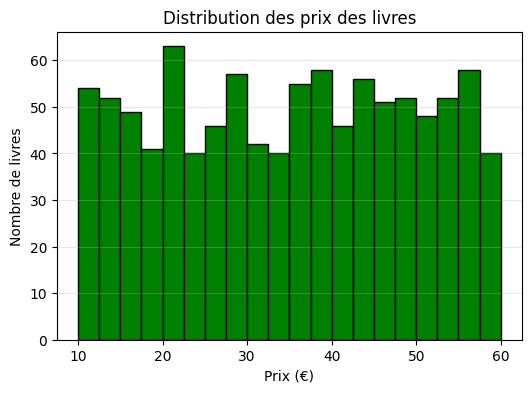

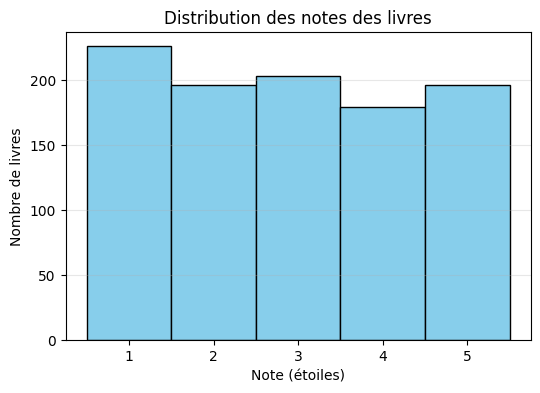

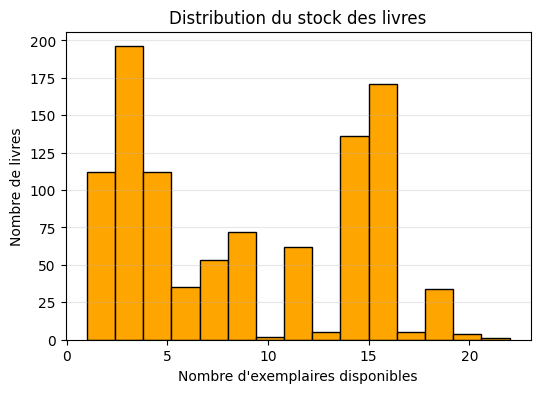

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv("livres_bruts.csv")

# --- Histogramme des prix ---
plt.figure(figsize=(6,4))
plt.hist(df['Price'], bins=20, color='green', edgecolor='black')
plt.title("Distribution des prix des livres")
plt.xlabel("Prix (€)")
plt.ylabel("Nombre de livres")
plt.grid(axis='y', alpha=0.3)
plt.show()

# --- Histogramme des notes ---
plt.figure(figsize=(6,4))
plt.hist(df['Rating'], bins=range(1,7), align='left', color='skyblue', edgecolor='black')
plt.title("Distribution des notes des livres")
plt.xlabel("Note (étoiles)")
plt.ylabel("Nombre de livres")
plt.xticks(range(1,6))
plt.grid(axis='y', alpha=0.3)
plt.show()

# --- Histogramme des disponibilités ---
plt.figure(figsize=(6,4))
plt.hist(df['availability_num'], bins=15, color='orange', edgecolor='black')
plt.title("Distribution du stock des livres")
plt.xlabel("Nombre d'exemplaires disponibles")
plt.ylabel("Nombre de livres")
plt.grid(axis='y', alpha=0.3)
plt.show()
